In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from datetime import datetime

In [41]:
df = pd.read_csv('Datamart-Export_DY_WK100-Dry Whey Prices and Sales_20170829_122601.csv')
df.head()

,Week Ending Date,Report Date,Date,Weighted Prices,Sales
0,08/19/2017,08/23/2017,07/22,0.4393,"8,287,589"
1,08/19/2017,08/23/2017,07/29,0.4489,"6,475,846"
2,08/19/2017,08/23/2017,08/05,0.4317,"7,322,913"
3,08/19/2017,08/23/2017,08/12,0.4330,"6,830,926"
4,08/19/2017,08/23/2017,08/19,0.4317,"6,587,954"


In [42]:
df.columns

Index(['Week Ending Date', 'Report Date', 'Date', 'Weighted Prices', 'Sales'], dtype='object')

#### Descrição das colunas

1. **Week Ending Date (Data de Término da Semana)**: Refere-se à data que marca o fim da semana à qual os dados se referem. É o ponto de referência temporal para os dados coletados semanalmente.

2. **Report Date (Data do Relatório)**: Indica a data em que o relatório com as informações de vendas de produtos lácteos foi oficialmente publicado ou liberado pela USDA, conforme exigido pela Lei de Relatório Obrigatório de Preços de 2010 (devendo ser antes da quarta-feira, 15h EST, exceto em feriados federais).

3. **Date (Data)**: Pode se referir a uma data específica associada à coleta ou registro das informações de vendas, possivelmente complementar às outras datas mencionadas.

4. **Weighted Prices (Preços Ponderados)**: Representa os preços médios ponderados das vendas de produtos lácteos selecionados, calculados com base no volume de vendas de cada transação, conforme coletado e analisado pelo AMS-Dairy Programs.

5. **Sales (Vendas)**: Refere-se ao volume total de vendas (em quantidade ou valor) dos produtos lácteos reportados semanalmente, agregados e publicados como parte das estatísticas obrigatórias.

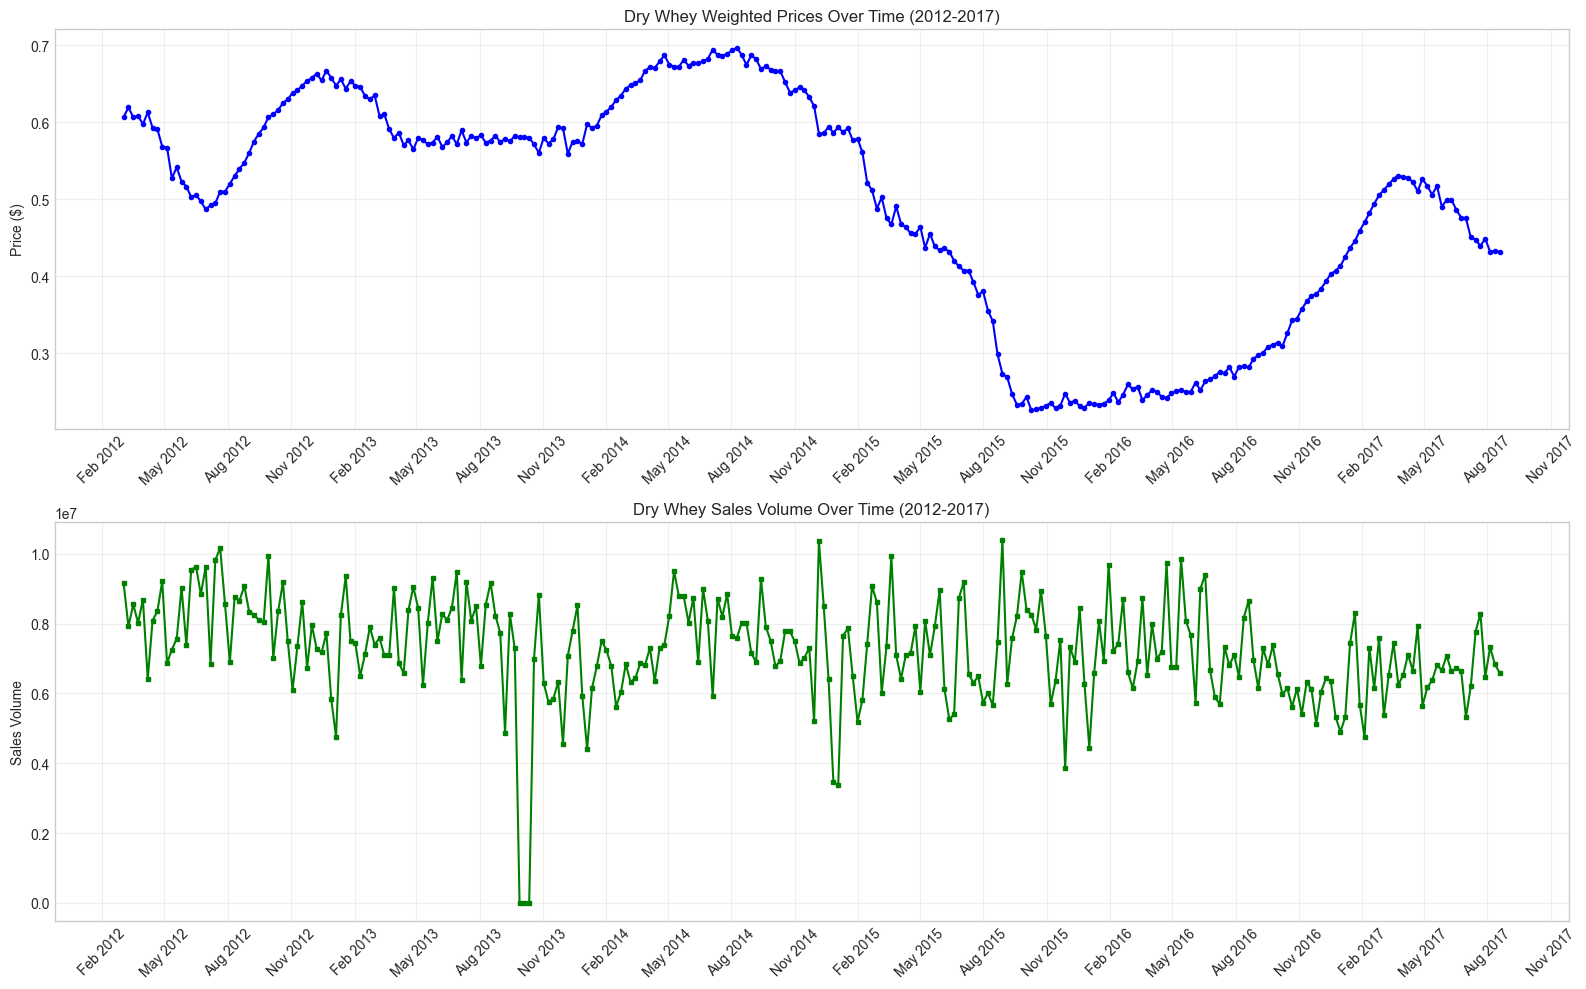

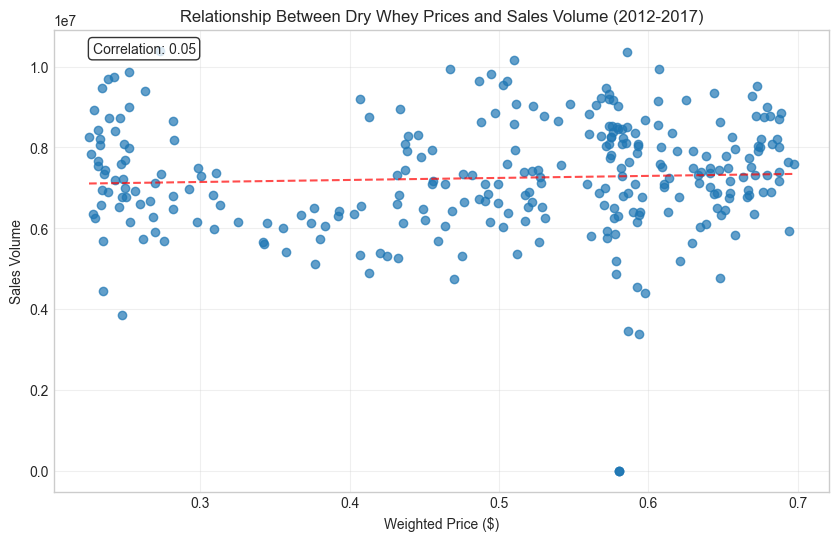

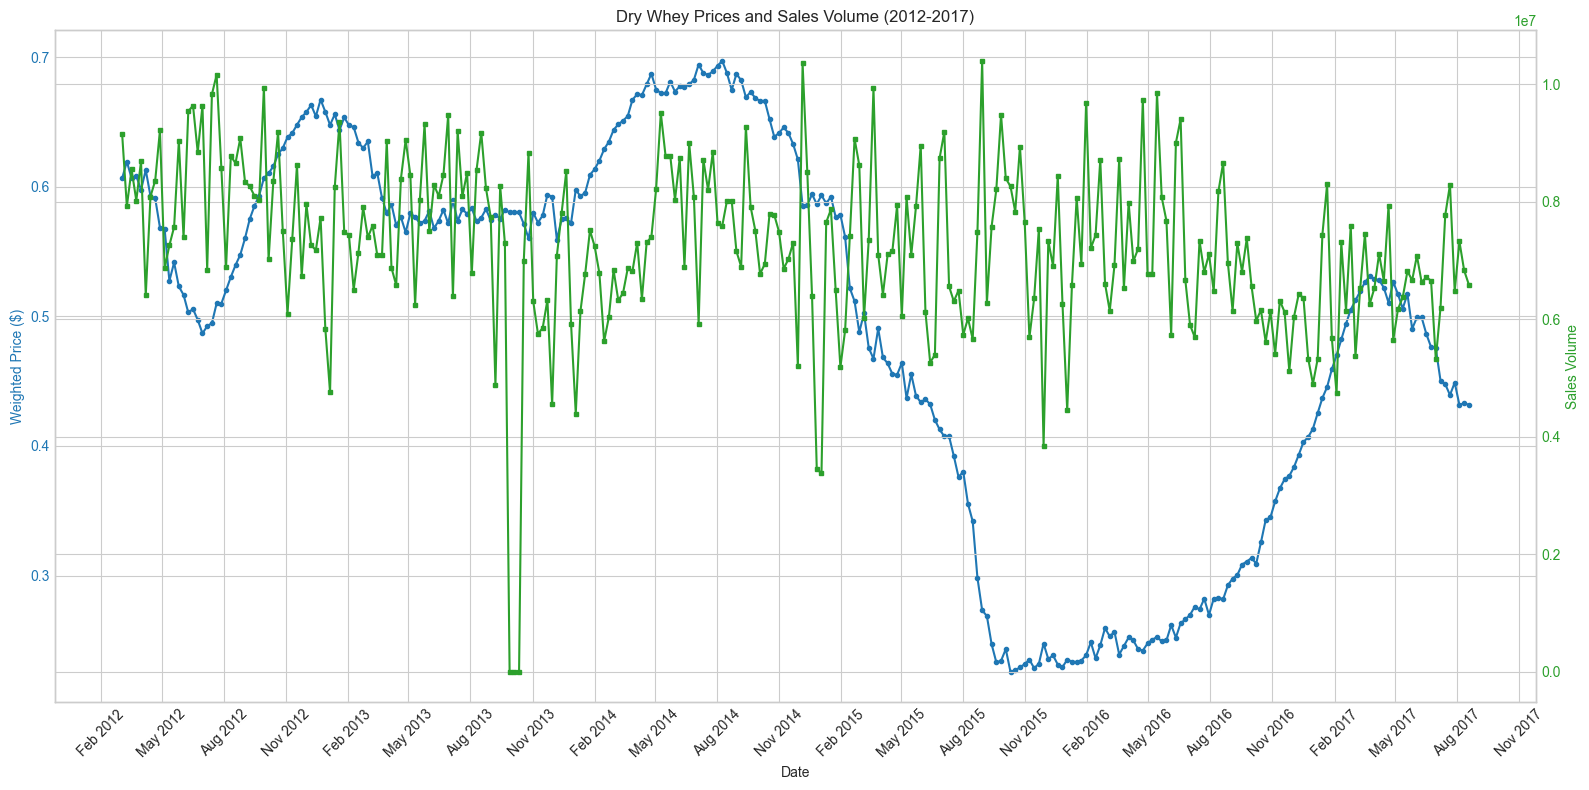

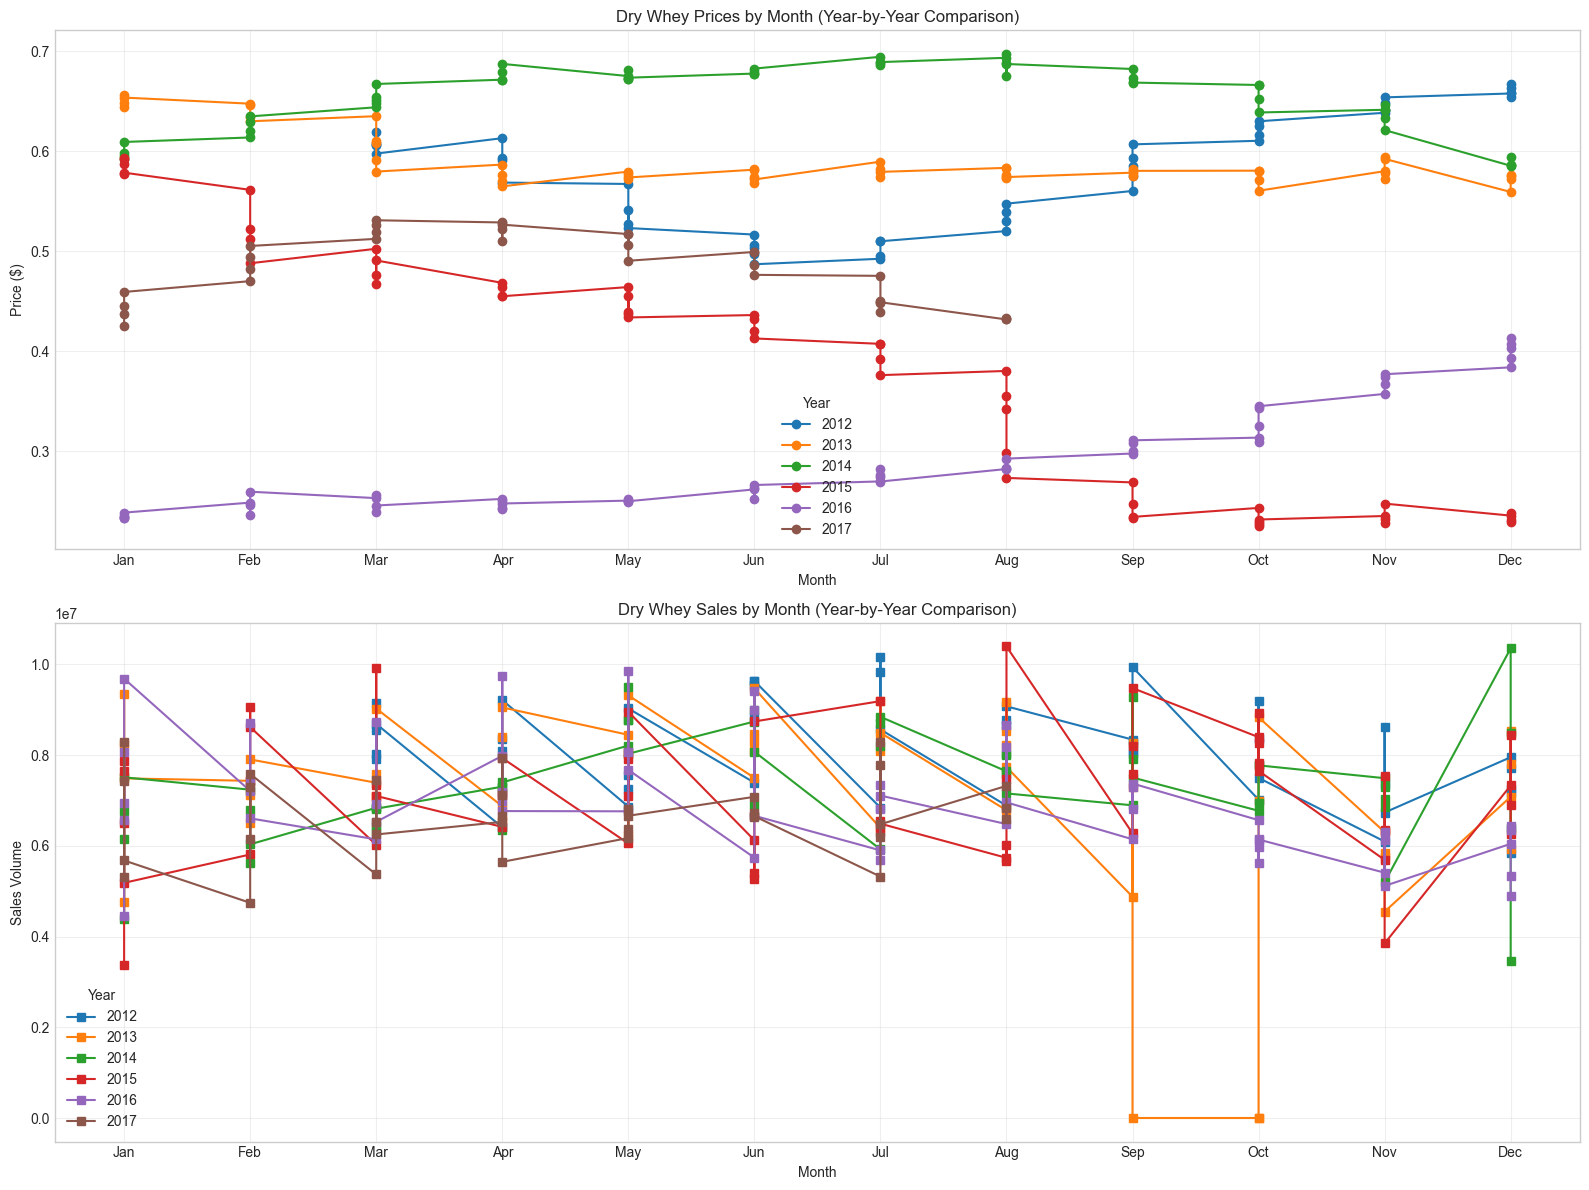

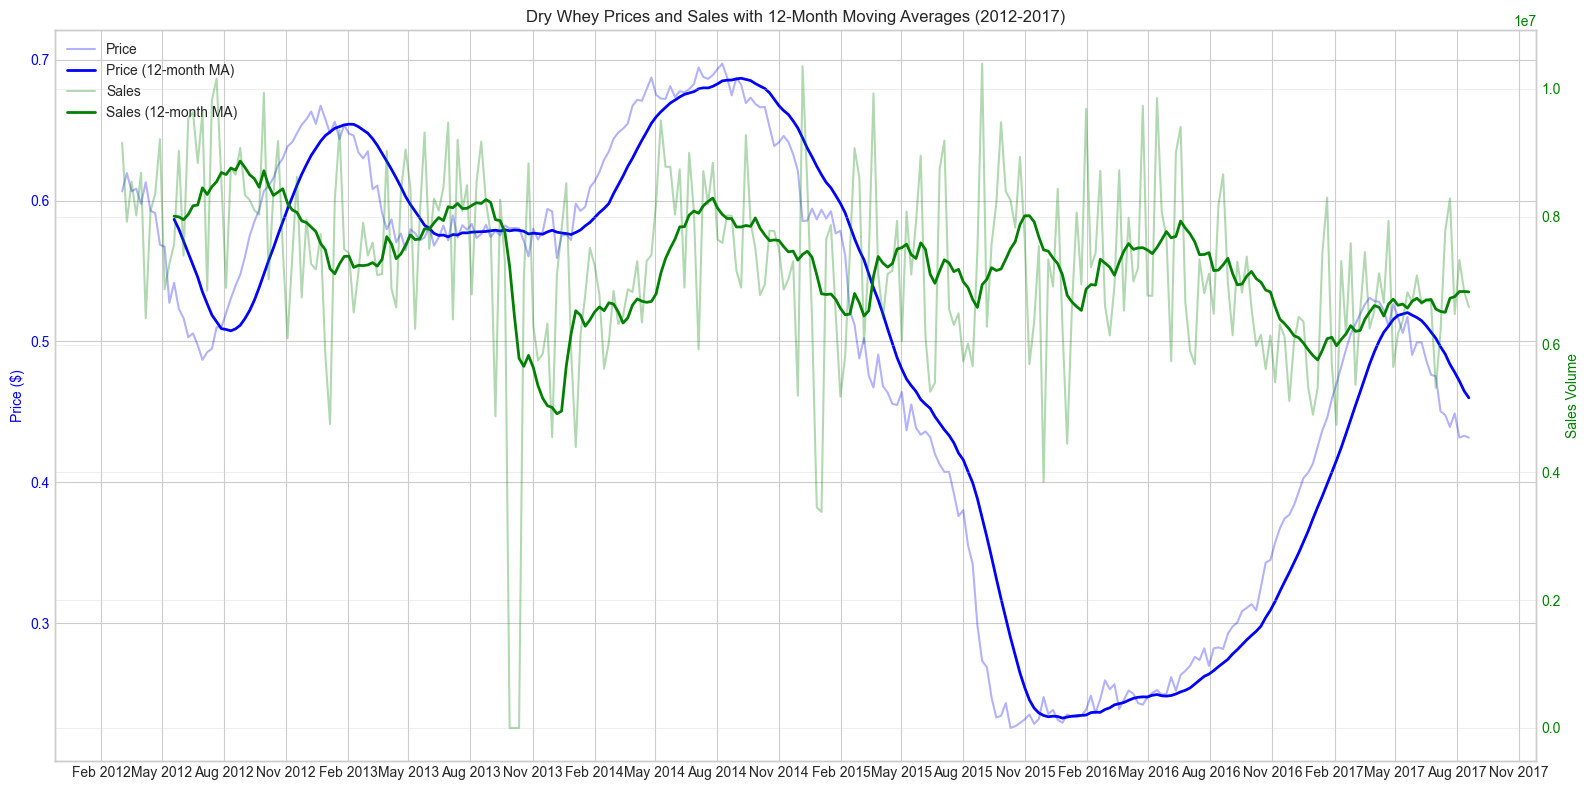

In [43]:


# For the sample provided, you'd load your full CSV file like this:
# df = pd.read_csv('Datamart-Export_DY_WK100-Dry_Whey_Prices_and_Sales.csv')

# Load data from your CSV file
df = pd.read_csv('Datamart-Export_DY_WK100-Dry Whey Prices and Sales_20170829_122601.csv')

# Clean and prepare data
df['Week Ending Date'] = pd.to_datetime(df['Week Ending Date'], format='%m/%d/%Y')
df['Report Date'] = pd.to_datetime(df['Report Date'], format='%m/%d/%Y')

# The Date column only has month/day, we need to add the correct year
# Approach: Use date from Week Ending Date to infer the correct year
dates = []
for i, row in df.iterrows():
    # Get month/day from the Date column
    month_day = row['Date'].split('/')
    month = int(month_day[0])
    day = int(month_day[1])
    
    # Get year from Week Ending Date
    ref_date = row['Week Ending Date']
    ref_year = ref_date.year
    
    # Handle year rollover (e.g., if Week Ending Date is in January but Date is December)
    # If the month in Date is much later than Week Ending Date, it's likely previous year
    if month > ref_date.month + 1 and ref_date.month < 3:
        year = ref_year - 1
    # If the month in Date is much earlier than Week Ending Date, it's likely same year
    else:
        year = ref_year
        
    # Create full date
    dates.append(datetime(year, month, day))

df['FullDate'] = dates

# Clean the Sales column (remove commas and convert to numeric)
df['Sales'] = df['Sales'].str.replace(',', '').astype(float)

# Remove duplicate date entries (since the same date can appear in multiple reports)
unique_dates_df = df.drop_duplicates(subset=['FullDate']).sort_values('FullDate')

# Set up the figure for visualization
plt.figure(figsize=(16, 10))

# Plot 1: Price over time
plt.subplot(2, 1, 1)
plt.plot(unique_dates_df['FullDate'], unique_dates_df['Weighted Prices'], marker='o', 
         linestyle='-', color='blue', markersize=3)
plt.title('Dry Whey Weighted Prices Over Time (2012-2017)')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
# Format x-axis for multi-year data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Plot 2: Sales over time
plt.subplot(2, 1, 2)
plt.plot(unique_dates_df['FullDate'], unique_dates_df['Sales'], marker='s', 
         linestyle='-', color='green', markersize=3)
plt.title('Dry Whey Sales Volume Over Time (2012-2017)')
plt.ylabel('Sales Volume')
plt.grid(True, alpha=0.3)
# Format x-axis for multi-year data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()

# Plot 3: Scatter plot to show price-sales relationship
plt.figure(figsize=(10, 6))
plt.scatter(unique_dates_df['Weighted Prices'], unique_dates_df['Sales'], alpha=0.7)
plt.title('Relationship Between Dry Whey Prices and Sales Volume (2012-2017)')
plt.xlabel('Weighted Price ($)')
plt.ylabel('Sales Volume')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(unique_dates_df['Weighted Prices'], unique_dates_df['Sales'], 1)
p = np.poly1d(z)
plt.plot(sorted(unique_dates_df['Weighted Prices']), 
         p(sorted(unique_dates_df['Weighted Prices'])), "r--", alpha=0.7)

# Calculate and display correlation coefficient
correlation = np.corrcoef(unique_dates_df['Weighted Prices'], unique_dates_df['Sales'])[0,1]
plt.annotate(f"Correlation: {correlation:.2f}", xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Plot 4: Combined time series with dual Y-axis
fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Weighted Price ($)', color=color)
ax1.plot(unique_dates_df['FullDate'], unique_dates_df['Weighted Prices'], 
         marker='o', linestyle='-', color=color, markersize=3)
ax1.tick_params(axis='y', labelcolor=color)
# Format x-axis for multi-year data
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Sales Volume', color=color)
ax2.plot(unique_dates_df['FullDate'], unique_dates_df['Sales'], 
         marker='s', linestyle='-', color=color, markersize=3)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Dry Whey Prices and Sales Volume (2012-2017)')
fig.tight_layout()

# Plot 5: Year-by-year comparison (to show seasonality)
unique_dates_df['Year'] = unique_dates_df['FullDate'].dt.year
unique_dates_df['Month'] = unique_dates_df['FullDate'].dt.month

plt.figure(figsize=(16, 12))

# Prices by year
plt.subplot(2, 1, 1)
for year in sorted(unique_dates_df['Year'].unique()):
    year_data = unique_dates_df[unique_dates_df['Year'] == year]
    plt.plot(year_data['Month'], year_data['Weighted Prices'], 
             marker='o', linestyle='-', label=str(year))

plt.title('Dry Whey Prices by Month (Year-by-Year Comparison)')
plt.xlabel('Month')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')

# Sales by year
plt.subplot(2, 1, 2)
for year in sorted(unique_dates_df['Year'].unique()):
    year_data = unique_dates_df[unique_dates_df['Year'] == year]
    plt.plot(year_data['Month'], year_data['Sales'], 
             marker='s', linestyle='-', label=str(year))

plt.title('Dry Whey Sales by Month (Year-by-Year Comparison)')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')

plt.tight_layout()

# Plot 6: 12-month moving averages to see long-term trends
unique_dates_df = unique_dates_df.sort_values('FullDate')
unique_dates_df['Price_MA'] = unique_dates_df['Weighted Prices'].rolling(window=12).mean()
unique_dates_df['Sales_MA'] = unique_dates_df['Sales'].rolling(window=12).mean()

plt.figure(figsize=(16, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot prices and its moving average
ax1.plot(unique_dates_df['FullDate'], unique_dates_df['Weighted Prices'], 
         'b-', alpha=0.3, label='Price')
ax1.plot(unique_dates_df['FullDate'], unique_dates_df['Price_MA'], 
         'b-', linewidth=2, label='Price (12-month MA)')
ax1.set_ylabel('Price ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot sales and its moving average
ax2.plot(unique_dates_df['FullDate'], unique_dates_df['Sales'], 
         'g-', alpha=0.3, label='Sales')
ax2.plot(unique_dates_df['FullDate'], unique_dates_df['Sales_MA'], 
         'g-', linewidth=2, label='Sales (12-month MA)')
ax2.set_ylabel('Sales Volume', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Dry Whey Prices and Sales with 12-Month Moving Averages (2012-2017)')
plt.grid(True, alpha=0.3)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import math


# Selecionar apenas as colunas que precisamos para previsão
data = unique_dates_df[['FullDate', 'Weighted Prices']].set_index('FullDate')

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Função para criar datasets de sequência
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Definir timestep (número de dias anteriores para prever o próximo)
time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape input para [samples, time_steps, features] formato exigido pelo LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)



In [45]:
# Dividir em conjunto de treino e teste (80% treino, 20% teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Construir o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, batch_size=32, verbose=1)

# Fazer previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverter as previsões de volta à escala original
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular RMSE
train_rmse = math.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test_inv, test_predict))
print(f'RMSE no treino: {train_rmse:.4f}')
print(f'RMSE no teste: {test_rmse:.4f}')

# Calcular MAE para contexto adicional
train_mae = mean_absolute_error(y_train_inv, train_predict)
test_mae = mean_absolute_error(y_test_inv, test_predict)
print(f'MAE no treino: {train_mae:.4f}')
print(f'MAE no teste: {test_mae:.4f}')

# Calcular MAPE (Erro Percentual Médio Absoluto)
train_mape = np.mean(np.abs((y_train_inv - train_predict) / y_train_inv)) * 100
test_mape = np.mean(np.abs((y_test_inv - test_predict) / y_test_inv)) * 100
print(f'MAPE no treino: {train_mape:.2f}%')
print(f'MAPE no teste: {test_mape:.2f}%')



Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.4448 - val_loss: 0.0606
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1041 - val_loss: 0.0254
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - val_loss: 0.0072
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0199 - val_loss: 0.0082
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0257 - val_loss: 0.0046
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0164 - val_loss: 0.0059
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - val_loss: 0.0044
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0121 - val_loss: 0.0054
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - val_loss: 0.0050
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - val_loss: 0.0058
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - val_loss: 0.0075
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - val_loss: 0.0083
Epoch 13/100

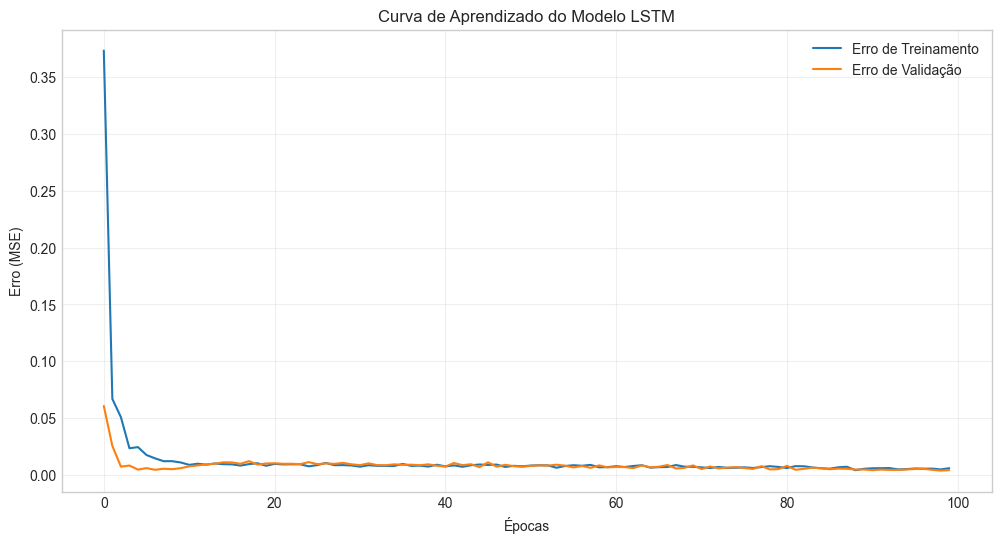

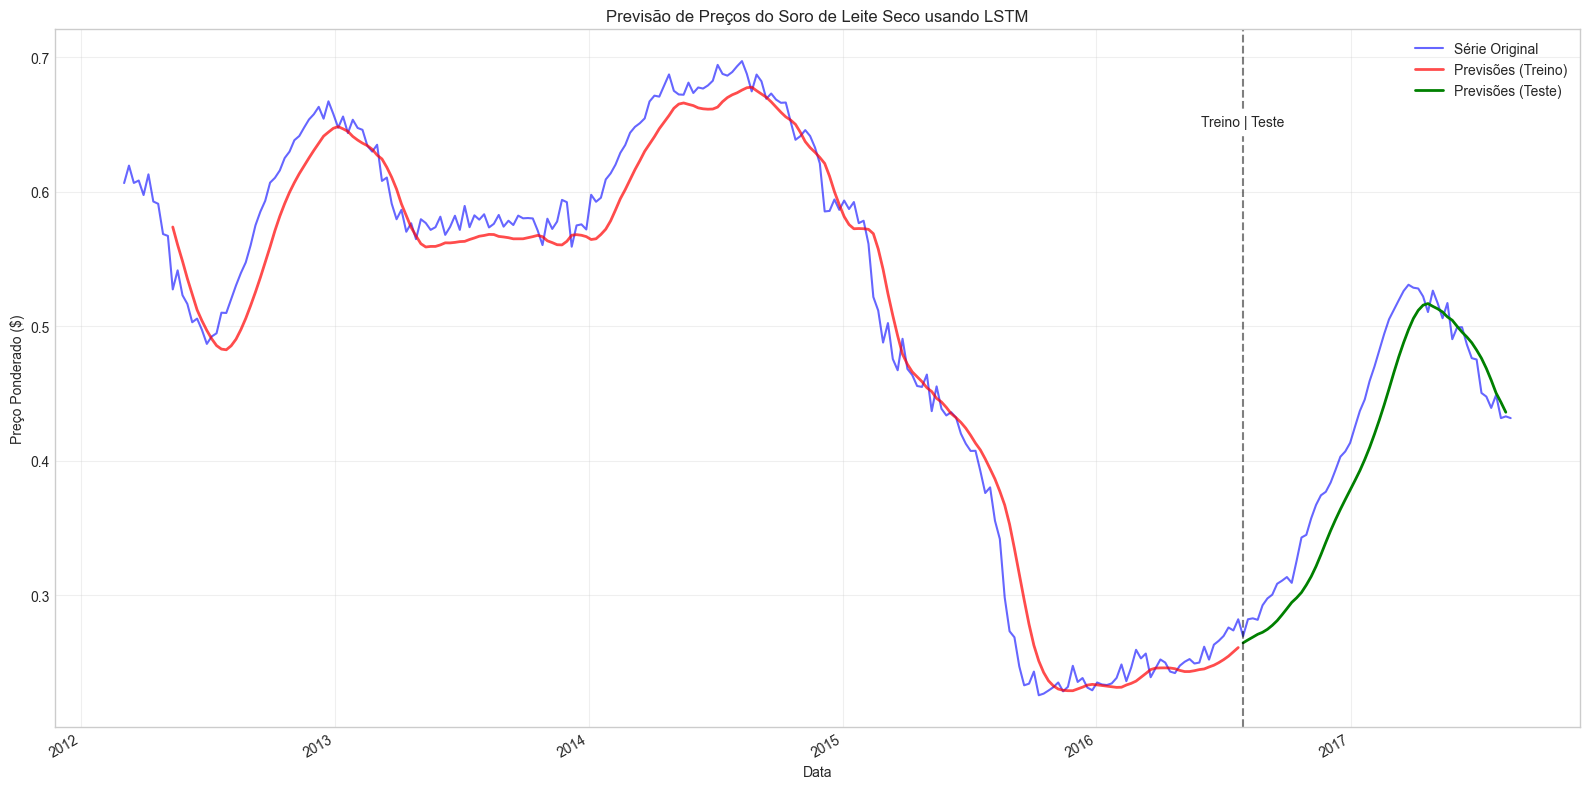

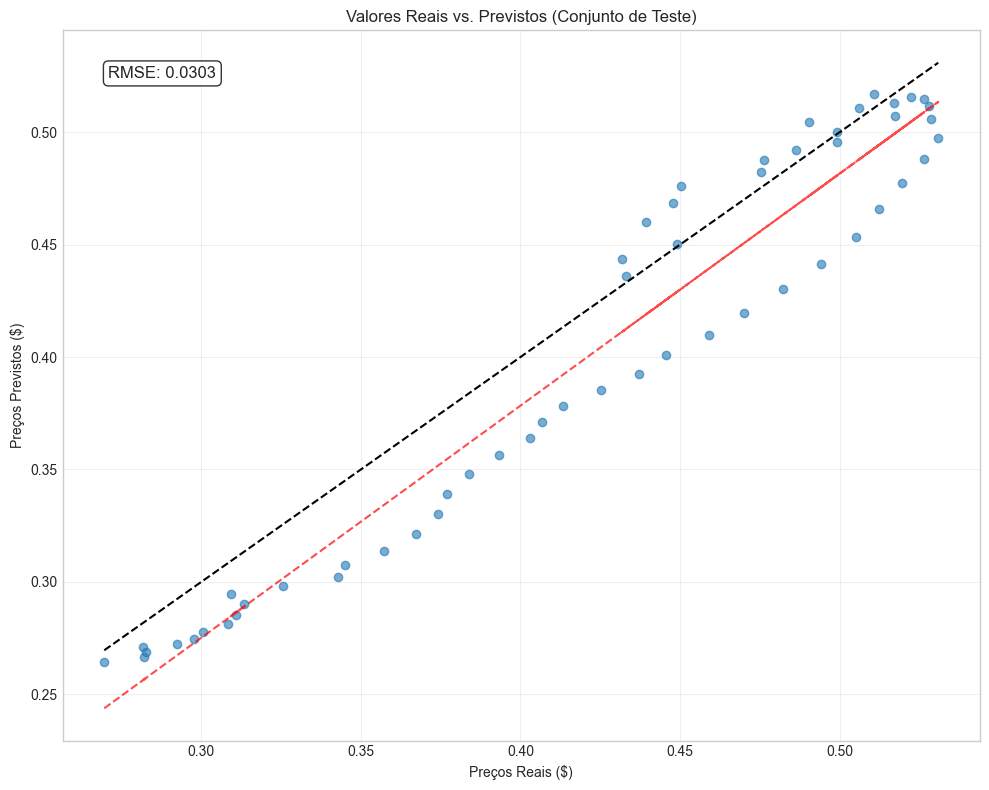

In [46]:
# Visualizar resultados

# Criar timestamps para visualização
# Usamos time_step para alinhar os dados corretamente
train_timestamps = unique_dates_df.iloc[time_step:train_size+time_step].FullDate
test_timestamps = unique_dates_df.iloc[train_size+time_step:len(X)+time_step].FullDate

# Plot de curva de aprendizado
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.title('Curva de Aprendizado do Modelo LSTM')
plt.xlabel('Épocas')
plt.ylabel('Erro (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot de previsões vs valores reais
plt.figure(figsize=(16, 8))
plt.plot(unique_dates_df.FullDate, scaler.inverse_transform(scaled_data), 
         'b-', label='Série Original', alpha=0.6)
plt.plot(train_timestamps, train_predict, 'r-', 
         label='Previsões (Treino)', linewidth=2, alpha=0.7)
plt.plot(test_timestamps, test_predict, 'g-', 
         label='Previsões (Teste)', linewidth=2)

# Adicionar linha vertical para separar treino/teste
split_date = unique_dates_df.iloc[train_size+time_step].FullDate
plt.axvline(x=split_date, color='k', linestyle='--', alpha=0.5)
plt.text(split_date, plt.ylim()[1]*0.9, 'Treino | Teste', 
         horizontalalignment='center', backgroundcolor='w')

plt.title('Previsão de Preços do Soro de Leite Seco usando LSTM')
plt.xlabel('Data')
plt.ylabel('Preço Ponderado ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Formatar eixo X para melhor visualização
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

# Visualização de dispersão (predito vs real) para conjunto de teste
plt.figure(figsize=(10, 8))
plt.scatter(y_test_inv, test_predict, alpha=0.6)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'k--')
plt.title('Valores Reais vs. Previstos (Conjunto de Teste)')
plt.xlabel('Preços Reais ($)')
plt.ylabel('Preços Previstos ($)')
plt.grid(True, alpha=0.3)

# Adicionar linha de tendência
z = np.polyfit(y_test_inv.flatten(), test_predict.flatten(), 1)
p = np.poly1d(z)
plt.plot(y_test_inv, p(y_test_inv), "r--", alpha=0.7)

# Adicionar RMSE ao gráfico
plt.text(0.05, 0.95, f'RMSE: {test_rmse:.4f}', transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()